A Monte Carlo Model of Simons Observatory's data retained including corrections for surcey effieicny, weather cuts, mean time to failure and mean time to repari.

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [325]:
efficiency = 0.85  ## fraction
MTTF = 40. ## day
MTTR = 10 ## day
total_days = 365


37 40 3
44 44 0
137 165 28
199 211 12
214 228 14
285 292 7
328 333 5
361 368 7


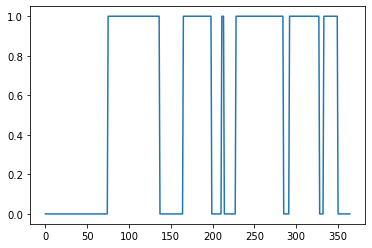

0.5726027397260273


In [320]:
## model the uptime

## do this as a unorm number of lost days



days = np.arange(total_days)
working  =np.ones(np.shape(days))
working[:75] = 0
working[-15:] = 0




i = 0
while (i < np.size(days)):
    time_to_fail = int(np.random.exponential() * MTTF)
    time_to_fix  = int(np.random.exponential() * MTTR)
    start = i+time_to_fail
    stop = i+time_to_fail+time_to_fix
    print(start,stop, stop - start)
    working[start:stop] = 0
    i = i+time_to_fail+time_to_fix

    
plt.plot(days,working)
plt.show()
print(np.sum(working / 365))

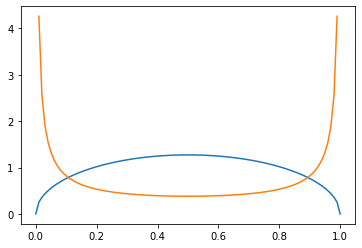

In [308]:
## model the weather 

a = np.array([1.5,0.25,2,3,8,10,
                          10,10,10,10,10,2])
b = np.array([1.5,0.25,0.9,1.5,1.5,1.5,
                          1.5,1.5,1.5,1.5,1.5,1.1]) 

i =0
while (i < 2):
    frac = np.arange(100)/99.
    plt.plot(dayofmon,beta.pdf(frac,a[i],b[i]))
    i+=1
    
    
    
    
#month= int(days *12/365)


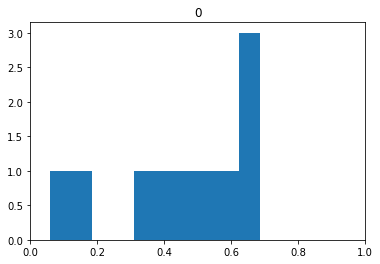

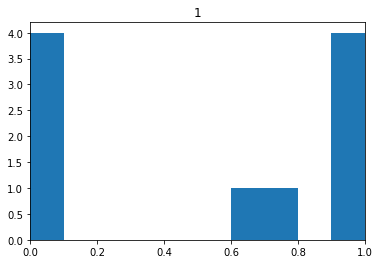

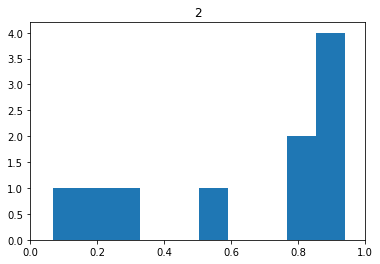

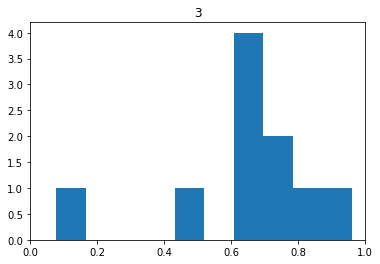

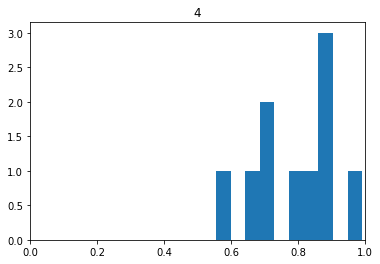

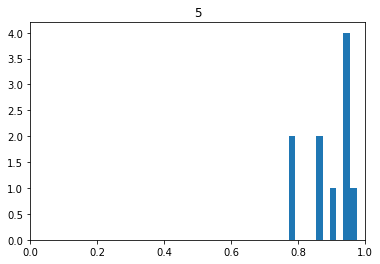

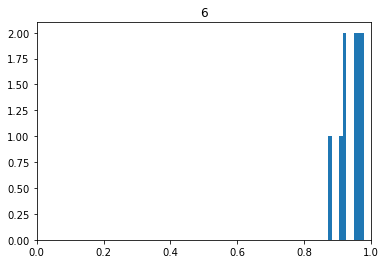

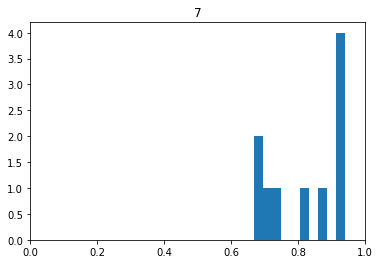

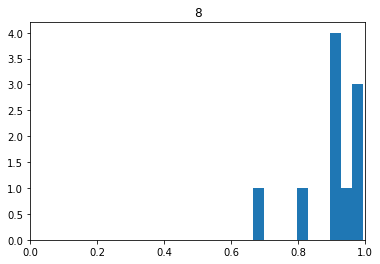

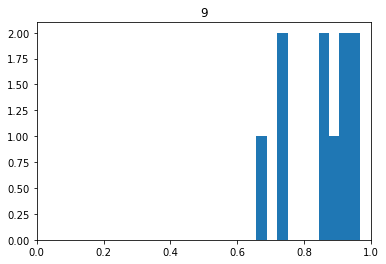

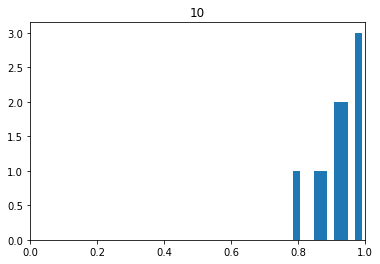

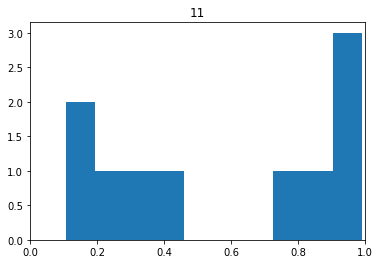

In [309]:
i = 0
while (i < 12):
    plt.hist(np.random.beta(a[i],b[i],size =10))
    plt.title(i)
    plt.xlim([0,1])
    plt.show()
    i+=1
    

[11 28 23  0 16  9  4 27 17  8 22 20 26  1 14 18  6 15 29 13  2  3  7 12
 10  5]
[]
[14 10 29 13 17 15  1  4  2 28 19  3 12  6 11 24]
[22 17  4 28 10]
[20  7]
[13 17 15 14  2 25 29  6]
[ 0 21  4 14 11 10]
[5]
[16 15 27  2 18]
[16 22]
[ 0  7 20]
[27 20 24  5  9 12 16]


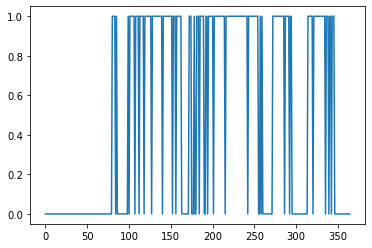

0.5013698630136987


In [310]:
i = 0
while (i < 12):
    frac  = np.random.beta(a[i],b[i])
    days_cut = np.arange(30)
    num_to_cut = int((1-frac)*30)
    pwv_cut = np.random.choice(days_cut,num_to_cut,replace=False )
    print(pwv_cut)
    working[i*30+pwv_cut] = 0
    i+=1
    
plt.plot(days,working)
plt.show()
print(np.sum(working / 365))

In [311]:
##include the overall effieicny 

print(np.sum(working / 365* efficiency))

0.42616438356164377


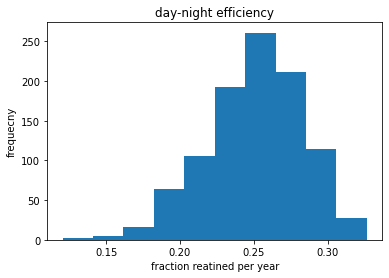

In [326]:
## generate N years of observations

N_years = 1000
realized_efficiency = np.zeros(N_years)

year = 0

while (year < N_years):
    

    ## model the failures and uptime 
    days = np.arange(total_days)
    working  =np.ones(np.shape(days))
    working[:75] = 0
    working[-15:] = 0

    i = 0
    while (i < np.size(days)):
        time_to_fail = int(np.random.exponential() * MTTF)
        time_to_fix  = int(np.random.exponential() * MTTR)
        start = i+time_to_fail
        stop = i+time_to_fail+time_to_fix
        working[start:stop] = 0
        i = i+time_to_fail+time_to_fix
        
    ## weather cut
    i = 0
    while (i < 12):
        frac  = np.random.beta(a[i],b[i])
        frac /=1.3
        days_cut = np.arange(30)
        num_to_cut = int((1-frac)*30)
        pwv_cut = np.random.choice(days_cut,num_to_cut,replace=False )
        working[i*30+pwv_cut] = 0
        i+=1
        
    ## store the result
    realized_efficiency[year] =   np.sum(working / 365  * efficiency*.75)
    ## iterate 
    year+=1


plt.hist(realized_efficiency)
plt.title("day-night efficiency")
plt.ylabel("frequecny")
plt.xlabel("fraction reatined per year")
plt.show()